### Step 1: Load the Data

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Customer Purchasing Behaviors.csv')

# Display the first few rows
print(data.head())

   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


### Step 2: Data Overview

In [3]:
# Data types and missing values
print(data.info())

# Summary statistics
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB
None
          user_id         age  annual_income  purchase_amount  loyalty_score  \
count  238.000000  238.000000     238.000000       238.000000     238.000000   
mean   119.500000   38.676471   57407.563025       425.630252       6.794118   
std     68.848868    9.351118   11403.875717       140.052062       1.899047   
min      1.000000   22.000000   30000.000000       150.000000      

### Step 3: Data Cleaning

In [5]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Duplicates: {duplicates}')

# Handling missing values if any (example)
data.dropna(inplace=True)  # Drop missing values

Duplicates: 0


### Step 4: Exploratory Data Analysis (EDA)

### Age Distribution: 
Analyze customer age distribution.

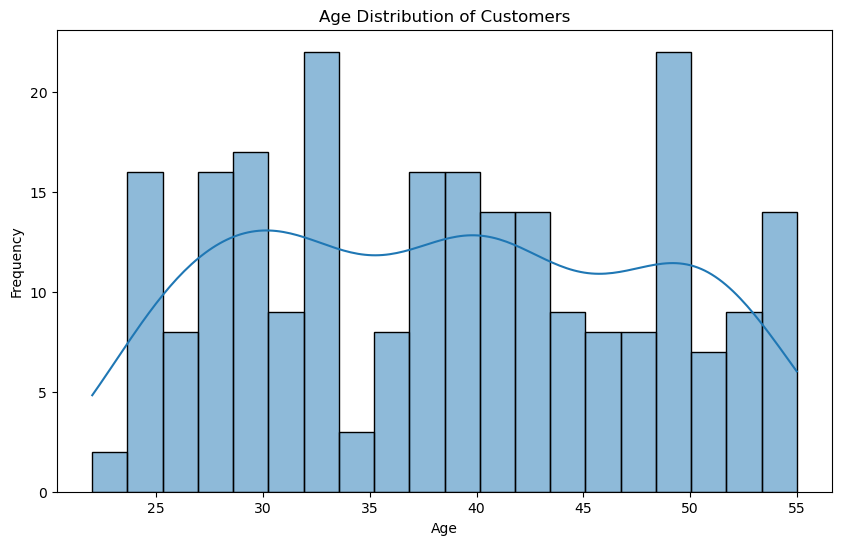

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Income vs. Purchase Amount:
Examine the relationship between annual income and purchase amount.

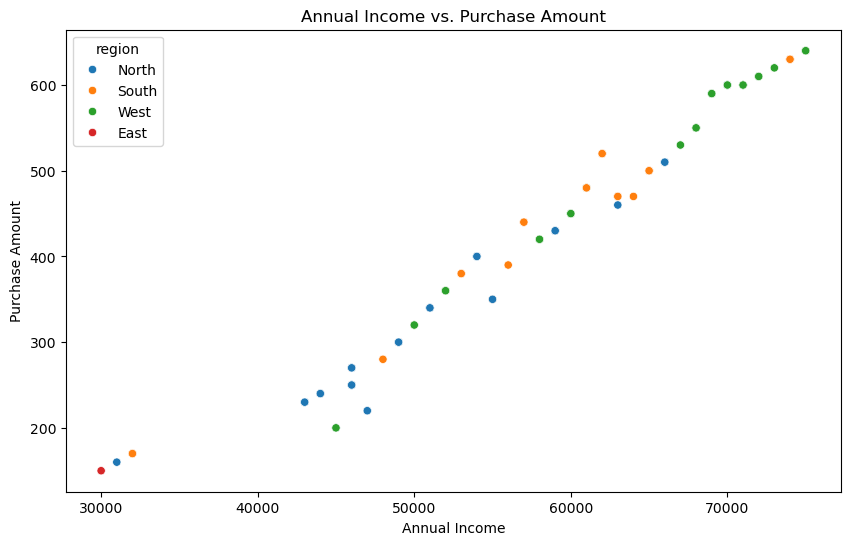

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='purchase_amount', data=data, hue='region')
plt.title('Annual Income vs. Purchase Amount')
plt.xlabel('Annual Income')
plt.ylabel('Purchase Amount')
plt.show()

### Loyalty Score Analysis: 
Analyze loyalty scores across regions.

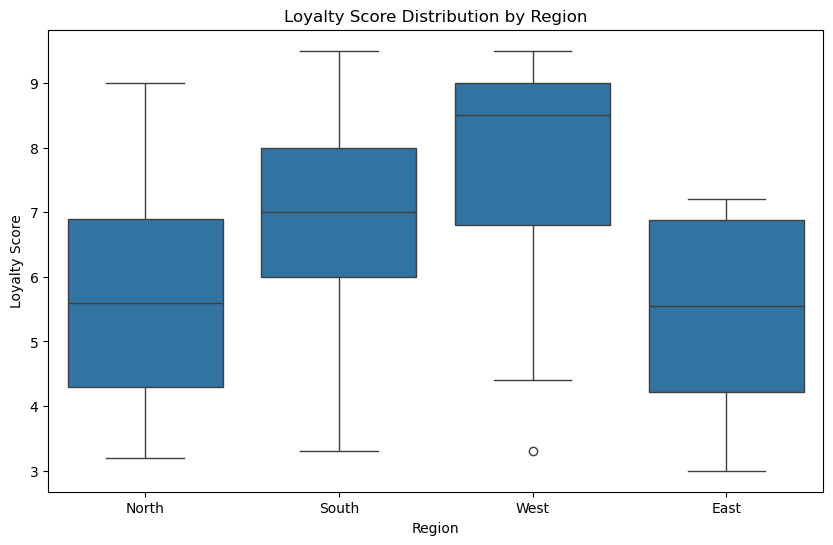

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='loyalty_score', data=data)
plt.title('Loyalty Score Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Loyalty Score')
plt.show()

### Step 5: Key Insights

### Customer Segmentation:
Use clustering or segmentation techniques based on age, income, and purchasing behavior to identify different customer segments.

C:\Users\kshit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


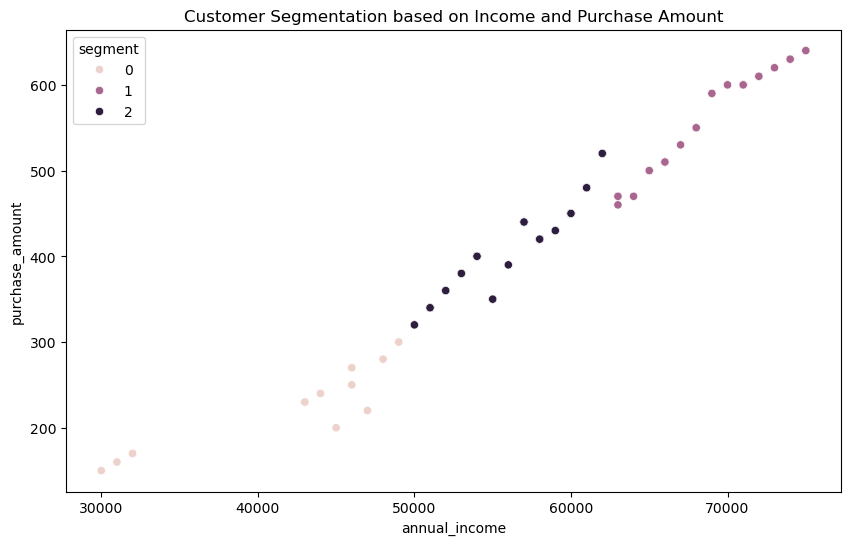

In [23]:
from sklearn.cluster import KMeans

# Selecting features for clustering
features = data[['age', 'annual_income', 'purchase_amount']]
kmeans = KMeans(n_clusters=3)
data['segment'] = kmeans.fit_predict(features)

# Visualizing segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='purchase_amount', hue='segment', data=data)
plt.title('Customer Segmentation based on Income and Purchase Amount')
plt.show()

### Buying Frequency: 
Investigate the relationship between purchase frequency and loyalty score.

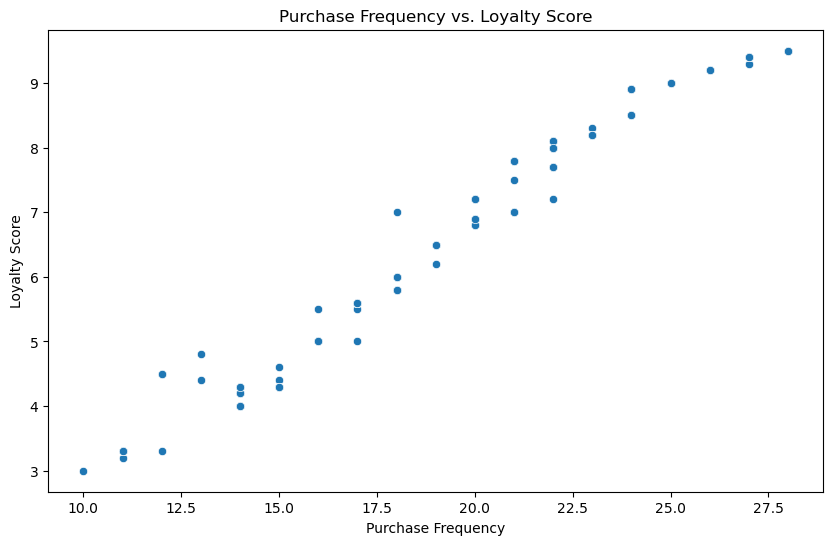

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchase_frequency', y='loyalty_score', data=data)
plt.title('Purchase Frequency vs. Loyalty Score')
plt.xlabel('Purchase Frequency')
plt.ylabel('Loyalty Score')
plt.show()

### Correlation Analysis :
To identify relationships between numerical variables, which can help in understanding how different factors influence purchasing behavior.

In [35]:
# One-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['region'], drop_first=True)

# Now, calculate the correlation matrix
correlation_matrix = data_encoded.corr()

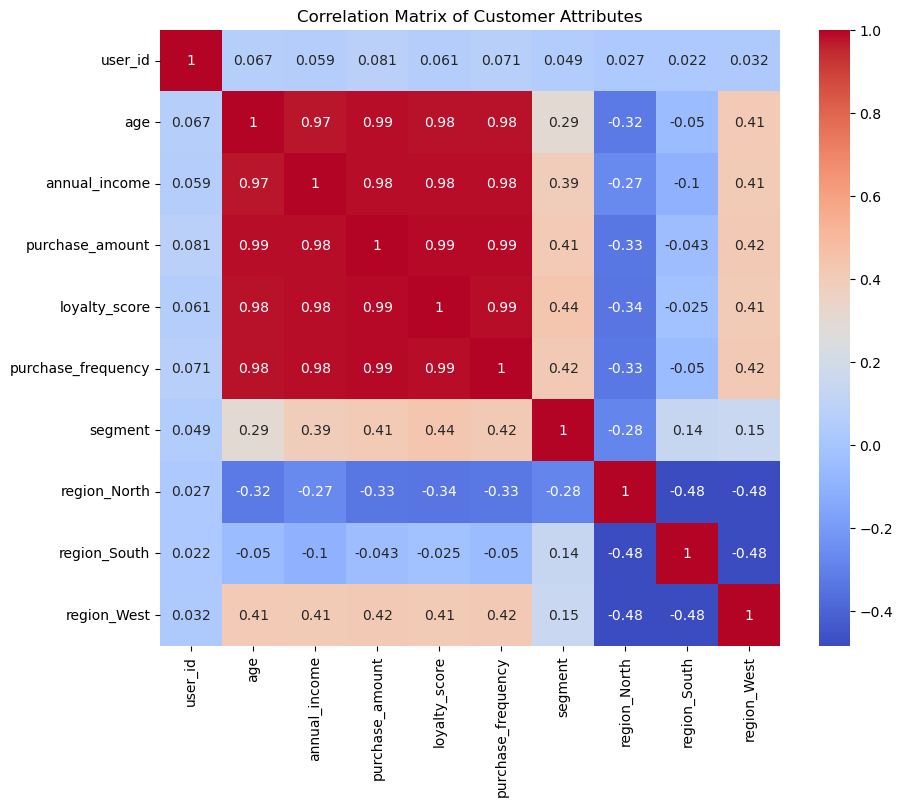

In [39]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Customer Attributes')
plt.show()

### Purchase Amount by Age Group : 
To observe how purchase behavior varies across different age groups.

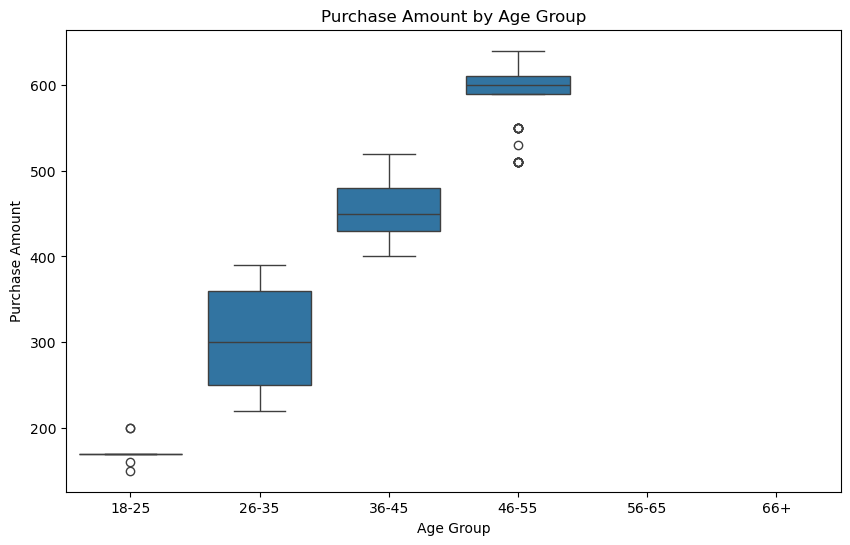

In [41]:
# Creating age groups
bins = [18, 25, 35, 45, 55, 65, 75]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Analyzing purchase amount by age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='purchase_amount', data=data)
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()

### Purchase Frequency Trends: 
To analyze how often customers make purchases and identify segments with higher purchasing activity.

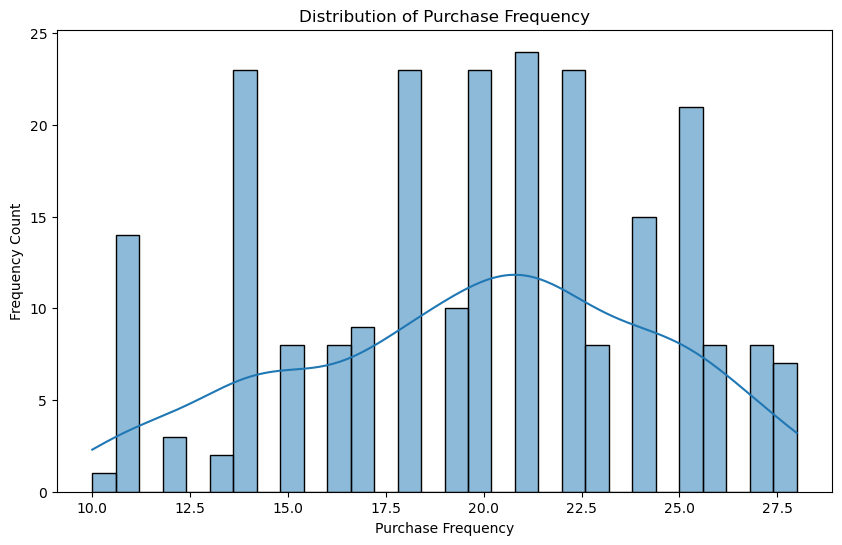

In [45]:
# Purchase frequency distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['purchase_frequency'], bins=30, kde=True)
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency Count')
plt.show()

### Loyalty Score Distribution:  
To examine how loyalty scores are distributed among customers and identify potential areas for improvement.

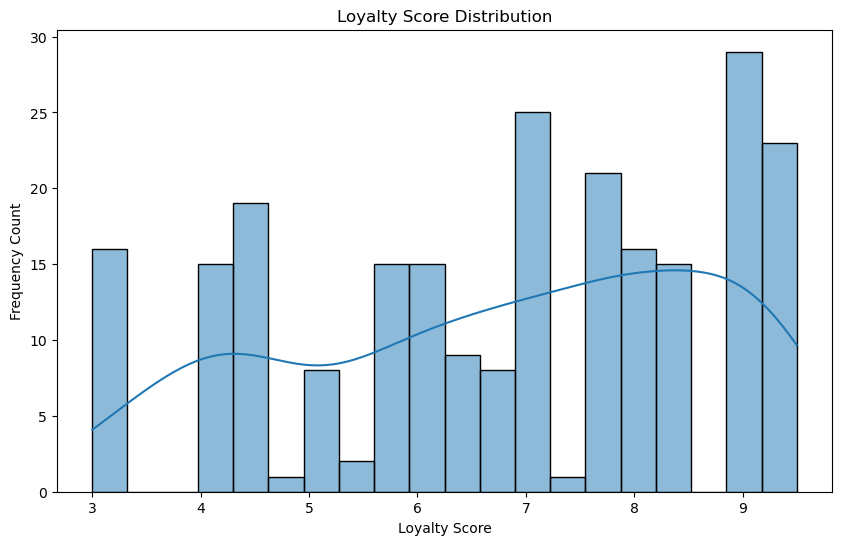

In [50]:
# Loyalty score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['loyalty_score'], bins=20, kde=True)
plt.title('Loyalty Score Distribution')
plt.xlabel('Loyalty Score')
plt.ylabel('Frequency Count')
plt.show()

### Income Segmentation Analysis:
To analyze how income levels impact purchasing behavior and loyalty.


C:\Users\kshit\AppData\Local\Temp\ipykernel_19760\3821661360.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_by_income = data.groupby('income_group')['purchase_amount'].mean().reset_index()


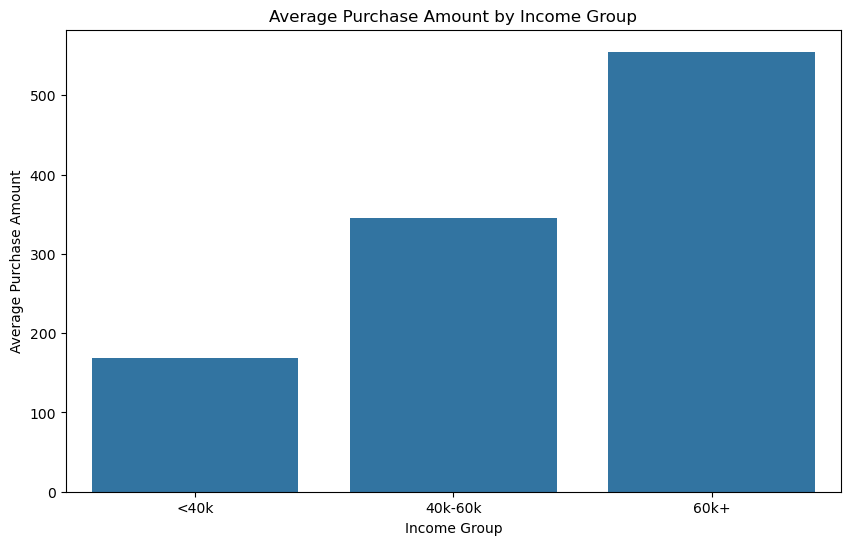

In [52]:
# Creating income groups
income_bins = [20000, 40000, 60000, 80000]
income_labels = ['<40k', '40k-60k', '60k+']
data['income_group'] = pd.cut(data['annual_income'], bins=income_bins, labels=income_labels)

# Average purchase amount by income group
avg_purchase_by_income = data.groupby('income_group')['purchase_amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='income_group', y='purchase_amount', data=avg_purchase_by_income)
plt.title('Average Purchase Amount by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Purchase Amount')
plt.show()

### Regional Analysis: 
To identify regional differences in purchasing behaviors and loyalty scores.

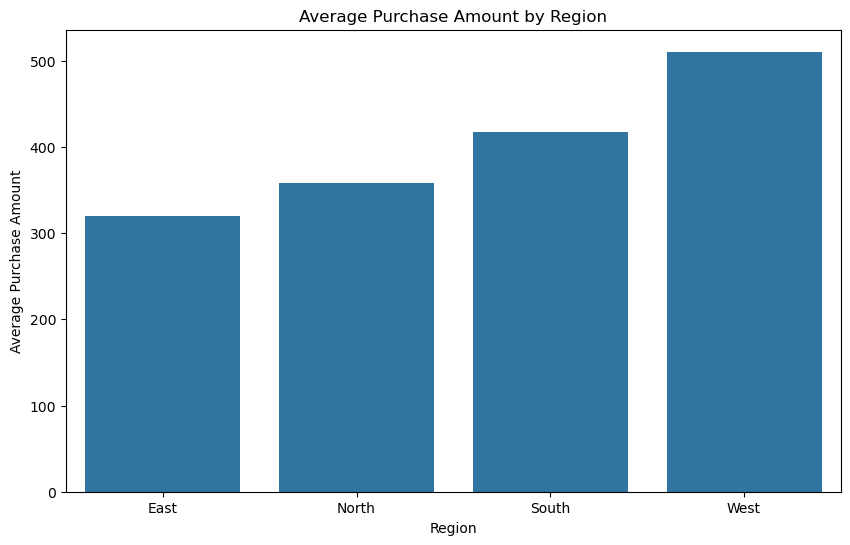

In [65]:
# Average purchase amount by region
avg_purchase_by_region = data.groupby('region')['purchase_amount'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='purchase_amount', data=avg_purchase_by_region)
plt.title('Average Purchase Amount by Region')
plt.xlabel('Region')
plt.ylabel('Average Purchase Amount')
plt.show()


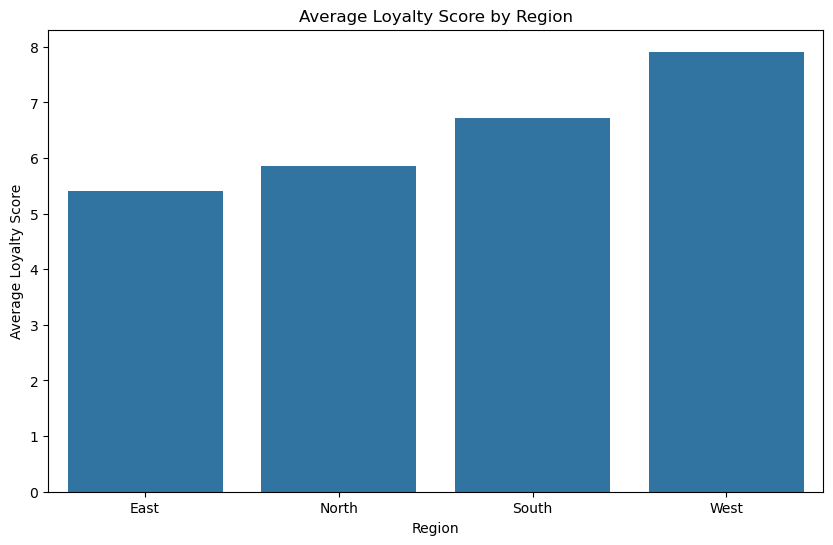

In [67]:
# Loyalty score by region
avg_loyalty_by_region = data.groupby('region')['loyalty_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='loyalty_score', data=avg_loyalty_by_region)
plt.title('Average Loyalty Score by Region')
plt.xlabel('Region')
plt.ylabel('Average Loyalty Score')
plt.show()

### Customer Retention Analysis: 
To analyze retention rates based on purchase frequency and loyalty scores.

Define Retained vs. Non-Retained Customers:
Retained: Customers with purchase frequency above a certain threshold.
Non-Retained: Customers below that threshold.

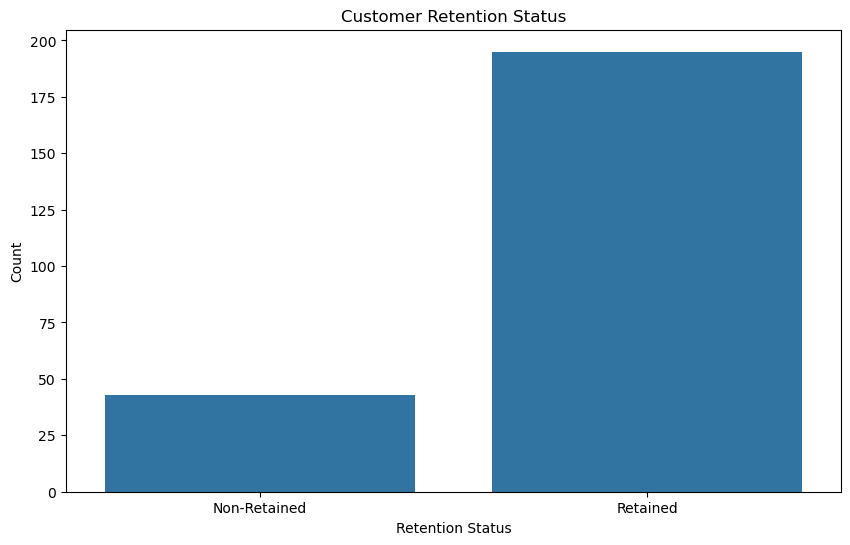

In [69]:
# Define retained and non-retained customers
retention_threshold = 15  # Example threshold
data['retention_status'] = data['purchase_frequency'].apply(lambda x: 'Retained' if x >= retention_threshold else 'Non-Retained')

# Retention status distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='retention_status', data=data)
plt.title('Customer Retention Status')
plt.xlabel('Retention Status')
plt.ylabel('Count')
plt.show()

### Step 6: Recommendations

Based on the comprehensive analysis of customer purchasing behaviors, here are actionable insights and recommendations:

1. **Targeted Marketing Campaigns**:
   - **Leverage High Loyalty Scores**: Focus marketing efforts on customers with loyalty scores above 7. Create personalized campaigns that reward these customers with exclusive offers, early access to new products, or loyalty points.

2. **Promotions for Frequent Buyers**:
   - **Engage Customers with High Purchase Frequency**: Identify customers who purchase frequently but have lower loyalty scores (e.g., below 5). Implement targeted promotions, such as discounts on future purchases or limited-time offers, to improve their loyalty and encourage repeat business.

3. **Customized Product Offerings**:
   - **Tailor Products by Age and Income**: Analyze purchasing patterns by age and income groups to customize product offerings. For example:
     - **Younger Customers (18-30)**: Focus on trendy, affordable items that appeal to their interests.
     - **Middle-Aged Customers (31-50)**: Highlight quality products that offer value for money.
     - **Older Customers (51+)**: Consider premium products or services that cater to their lifestyle needs.

4. **Regional Marketing Strategies**:
   - **Adapt Strategies by Region**: Customize marketing and sales strategies based on regional purchasing behaviors. For instance, if a particular region shows higher loyalty or purchase amounts, invest in local promotions or partnerships to strengthen relationships.

5. **Customer Feedback Mechanisms**:
   - **Implement Regular Surveys**: Conduct customer feedback surveys to gain insights into customer preferences and satisfaction. Use this feedback to refine marketing strategies and product offerings continuously.

6. **Cross-Selling and Upselling**:
   - **Enhance Sales Techniques**: Utilize customer purchase history to implement cross-selling and upselling strategies. Suggest complementary products based on past purchases, particularly for high-frequency buyers.

7. **Retention Programs for At-Risk Customers**:
   - **Identify and Engage At-Risk Customers**: Monitor purchasing trends to identify customers whose frequency is declining. Implement retention strategies such as personalized outreach, special offers, or loyalty incentives to encourage them to return.

8. **Monitor Customer Trends**:
   - **Continuous Analysis**: Regularly analyze customer data to identify changing trends in purchasing behavior. This allows for timely adjustments in marketing strategies, product offerings, and customer engagement practices.

9. **Use Data-Driven Decisions**:
   - **Leverage Analytics Tools**: Invest in analytics tools to track customer behavior, preferences, and campaign effectiveness. This data can inform future strategies and enhance overall business performance.

10. **Promote Community Engagement**:
    - **Local Events and Sponsorships**: Engage with customers through community events or sponsorships, especially in regions with high loyalty scores. This can strengthen brand loyalt base and a stronger market position. ultimately drive sales growth.